# Multivariate Linear Regression

We are going to do linear regression, using 2 features.
1. Body Masses (kg)
2. Work levels (calories/hour)

With that we are going to predict the heat level produced (calories).

First we extract the data. We display the data in two plots:
1. bodymass/heat
2. work level/heat

Then we will use a simple self-implemented gradient descent algorithm to create a prediction. Specifically 'batch' gradient descent.

In [4]:
import numpy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


The data is contained in a file called "muscle1.dat". It is stored as follows:

    mass    work_level    heat_output
We need to format this to an array afterwards.

In [5]:
# Extract data
file_name = "muscle1.dat"
with open(file_name, 'r') as f:
    raw_data = f.readlines()

# show part of data we are working with
print(raw_data[0])

    43.7      19     177



In [6]:
# change to arrays
data_x = numpy.empty(shape=(len(raw_data),2))
data_y = numpy.empty(shape=(len(raw_data)))

for i, line in enumerate(raw_data):
    line_data = ' '.join(line.split()).split()
    
    data_x[i] = [line_data[0], line_data[1]]
    data_y[i] = line_data[2]

# print example data
print(data_x[3])
print(data_y[3])

[54.6 13. ]
160.0


# Visualization
We have all the data. We are not going to normalize it. We also do not need a test dataset.

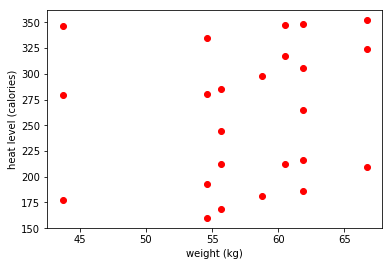

In [7]:
# Make your plot, set your axes labels
plt.plot(data_x[:, 0], data_y, 'ro') # data[:, 0] gets the first column of an numpy array
plt.xlabel('weight (kg)')
plt.ylabel('heat level (calories)')

plt.show()

This looks pretty random, but their is probably a coherence with the other data.

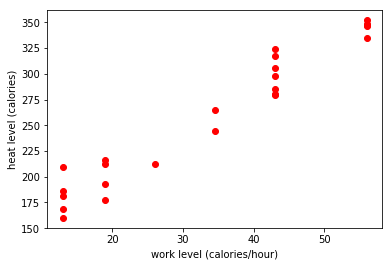

In [8]:
# Make your plot, set your axes labels
plt.plot(data_x[:, 1], data_y, 'ro') # data[:, 1] gets the first column of an numpy array
plt.xlabel('work level (calories/hour)')
plt.ylabel('heat level (calories)')

plt.show()

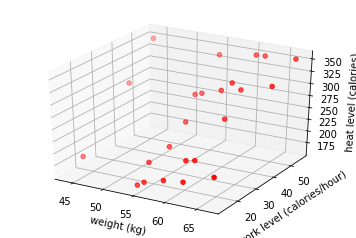

In [9]:
# Make your plot, set your axes labels

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data_x[:, 0], data_x[:, 1], data_y, c='r', marker='o')

ax.set_xlabel('weight (kg)')
ax.set_ylabel('work level (calories/hour)')
ax.set_zlabel('heat level (calories)')

plt.show()

# Training

Now we can start training, this shouldn't take too many epochs if we set the learning rate correctly. The dataset is also very small so training will go very fast.

In [38]:
def hypotisis(weights, data):
    """
    @param data: this should be in the shape (..., 3) 
                 where the whole one of the columns should be 1 to be used as a bias
    """
    transposed = numpy.transpose(weights)
    return numpy.dot(transposed, data)

In [69]:
def cost(data_x, data_y, weights):
    cost = 0
    for i in range(len(data_x)):
        h = hypotisis(weights, data_x[i])
        cost += (h - data_y[i])**2
   
    return str(cost)

In [ ]:
epochs = 10000
learning_rate = 0.000001


def bgd(data_x, data_y, epochs=100, l_rate=0.0001):
    weights = numpy.zeros(shape=(3))

    len_data = data_y.size

    for epoch in range(epochs):
        weights_temp = numpy.zeros(shape=(3))

        for i in range(len_data):
            for feature_num in range(weights_temp.size):
                h = hypotisis(weights, data_x[i])
                result = l_rate*((h - data_y[i])*data_x[i][feature_num])/len_data
                weights_temp[feature_num] -= result

        weights += weights_temp
        if (epoch % 1000 == 0):
            print("Cost: ", cost(data_x, data_y, weights))
    return weights


# add ones to the end of the x dataset so the last weight is also the bias
new_column = numpy.ones(shape=(data_y.size, 1))
data_x_extended = numpy.append(data_x, new_column, 1)

weights = bgd(data_x_extended, data_y, epochs, learning_rate)
print("weights: ", weights)

Cost:  1707345.3752123911
Cost:  19143.577225894875
Cost:  13536.222892011714
Cost:  9905.760228998312
Cost:  7478.496442384209
Cost:  5855.661432481838
Cost:  4770.655812729421
Cost:  4045.2351083900685


# Test

To see how well we did we are going to look at the prediction in a 3d scatterplot.

[178.59000000000003, 274.59000000000003, 326.59000000000003, 173.12, 197.12, 293.12, 345.12, 174.99, 226.99, 260.99, 294.99, 180.26, 300.26, 207.15, 303.15000000000003, 355.15000000000003, 185.53, 209.53, 271.53, 305.53000000000003, 357.53000000000003, 193.69, 313.69, 365.69]


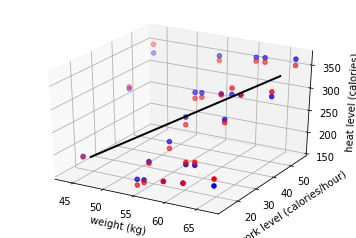

In [75]:
# Make your plot, set your axes labels

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data_x[:, 0], data_x[:, 1], data_y, c='r', marker='o')

ax.set_xlabel('weight (kg)')
ax.set_ylabel('work level (calories/hour)')
ax.set_zlabel('heat level (calories)')

points_x = [[45, 19, 1], [66, 50, 1]]
points_y = [hypotisis(weights, points_x[0]), hypotisis(weights, points_x[1])]


plt.plot([points_x[0][0], points_x[1][0]], 
         [points_x[0][1], points_x[1][1]], 
          points_y, 'k-', lw=2)
pred_y = []
for data in data_x_extended:
    pred_y.append(hypotisis(weights, data))
print(pred_y)

ax.scatter(data_x[:, 0], data_x[:, 1], pred_y, c='b', marker='o')

plt.show()